In [ ]:
pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 4.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
from google.colab import drive
from os import path
import os
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install neuralprophet
!pip install statsmodels

     |████████████████████████████████| 74 kB 2.1 MB/s 
     |████████████████████████████████| 172 kB 10.8 MB/s 
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.5.2
    Uninstalling holidays-0.10.5.2:
      Successfully uninstalled holidays-0.10.5.2


In [ ]:
from neuralprophet import NeuralProphet
import pandas as pd


In [ ]:
from pandas import read_csv
# load data
path = 'gdrive/My Drive/Colab Notebooks/waterlevel.csv'
df = read_csv(path, header=0)
# summarize shape
df = df.iloc[1: , :]
print(df.shape)

print(df)

(38, 2)
          date  water level
1   13-03-2019      377.839
2   09-04-2019      378.170
3   06-05-2019      378.363
4   02-06-2019      378.063
5   29-06-2019      376.730
6   26-07-2019      378.722
7   22-08-2019      379.044
8   18-09-2019      379.601
9   15-10-2019      379.362
10  11-11-2019      380.123
11  08-12-2019      379.126
12  04-01-2020      378.029
13  31-01-2020      376.427
14  27-02-2020      375.793
15  25-03-2020      378.326
16  21-04-2020      378.045
17  18-05-2020      377.646
18  14-06-2020      375.314
19  11-07-2020      377.049
20  07-08-2020      380.886
21  03-09-2020      380.647
22  30-09-2020      380.071
23  27-10-2020      379.635
24  23-11-2020      378.390
25  20-12-2020      378.675
26  16-01-2021      379.254
27  12-02-2021      378.053
28  11-03-2021      376.375
29  07-04-2021      377.629
30  04-05-2021      377.736
31  31-05-2021      375.378
32  27-06-2021      379.106
33  24-07-2021      379.665
34  20-08-2021      376.918
35  16-09-20

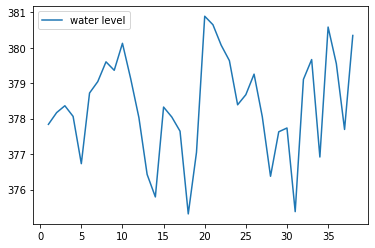

In [ ]:
from matplotlib import pyplot
df.plot()
pyplot.show()

In [ ]:

df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])
df.sort_values("ds", inplace = True)
df['ds']=df['ds'].dt.to_period('M')
df['ds'] = df['ds'].astype(str)
df['ds'] = pd.to_datetime(df['ds'])

df.drop_duplicates(subset ="ds",
                     keep = False, inplace = True)

In [ ]:
df

,ds,y
4,2019-02-01,378.063
1,2019-03-01,377.839
6,2019-07-01,378.722
9,2019-10-01,379.362
10,2019-11-01,380.123
13,2020-01-01,376.427
14,2020-02-01,375.793
17,2020-05-01,377.646
18,2020-06-01,375.314
20,2020-07-01,380.886


In [ ]:
# define the model

model = NeuralProphet()
# fit the model
model.fit(df)

INFO - (NP.df_utils._infer_frequency) - Major frequency MS corresponds to 45.0% of the data.
INFO:NP.df_utils:Major frequency MS corresponds to 45.0% of the data.
WARNING - (NP.df_utils._infer_frequency) - The auto-frequency feature is not able to detect the following frequencies: SM, BM, CBM, SMS, BMS, CBMS, BQ, BQS, BA, or, BAS. If the frequency of the dataframe is any of the mentioned please define it manually.


ValueError: ignored

          ds        yhat  yhat_lower  yhat_upper
0 2022-01-01  380.606493  379.543012  381.668993
1 2022-02-01  380.450551  379.344196  381.451728
2 2022-03-01  377.483964  376.373919  378.529521
3 2022-04-01  374.398464  373.396275  375.480826


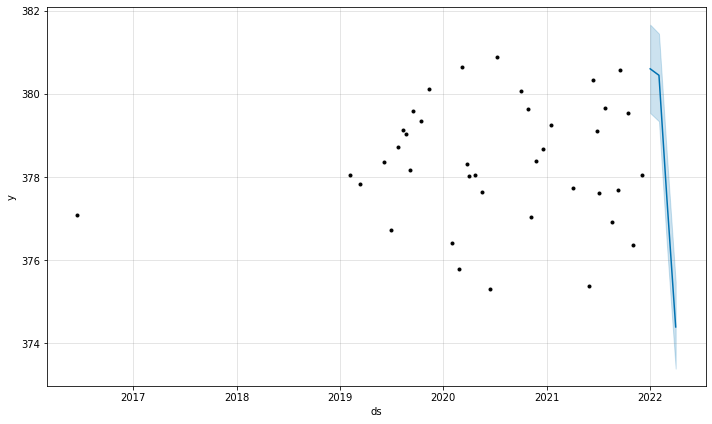

In [ ]:
from pandas import read_csv
from pandas import to_datetime
from pandas import DataFrame
from fbprophet import Prophet
from matplotlib import pyplot

# define the period for which we want a prediction
future = list()
for i in range(1, 5):
	date = '2022-%02d' % i
	future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

          ds        yhat  yhat_lower  yhat_upper
0 2019-01-01  383.844399  382.840306  384.981902
1 2019-02-01  376.139388  375.044855  377.262348
2 2019-03-01  373.276413  372.212035  374.384412
3 2019-04-01  377.977029  376.988337  379.039626
4 2019-05-01  378.810234  377.795449  379.900221


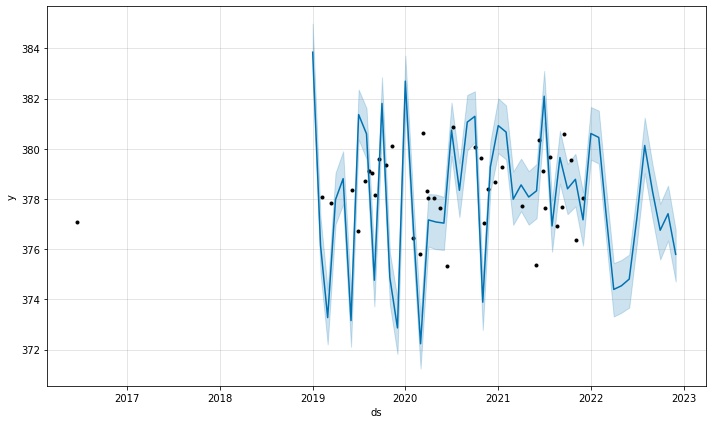

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(2019,2023):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append([date])
future = DataFrame(future)
future.columns = ['ds']
future['ds']= to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

In [ ]:
train = df.drop(df.index[-72:-60])
print(train.tail())

           ds        y
34 2021-08-20  376.918
35 2021-09-16  380.581
36 2021-10-13  379.550
37 2021-09-11  377.695
38 2021-06-12  380.344


RMSE: 1.241
MAE: 0.863


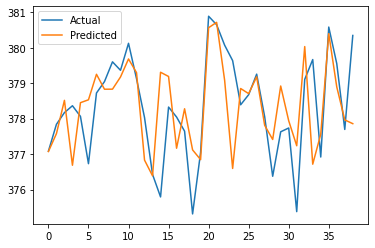

In [ ]:
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot

future = list()
for i in df['ds'][:]:
  future.append(i)
'''for i in range(2018,2021):
  for j in range(1, 13):
    date = '%04d-%02d' % (i,j)
    future.append([date])'''
future = DataFrame(future)
future.columns = ['ds']
future['ds'] = to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)


y_true = df['y'][:].values
y_pred = forecast['yhat'].values
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_true, y_pred, squared=False)
print('RMSE: %.3f' % rmse)
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()

In [ ]:
from statsmodels.tsa.ar_model import AutoReg
from random import random
# fit model
model = AutoReg(df, lags=1)
model_fit = model.fit()
# make prediction
yhat = model_fit.predict(len(df), len(df))
print(data)

ValueError: ignored